# Imports

In [1]:
import pandas as pd
from rdkit import Chem
import numpy as np
import seaborn as sns
from descriptors.preprocessing import preprocess
from descriptors.dft_featurisation import *
import matplotlib.pyplot as plt

Fonctions utiles pour la suite (à decrire de maniere plus detaillee pour publication)

In [2]:
data_path = "data/utils/"

descritpors_to_remove_lig = ["number_of_atoms", "charge", "multiplicity", "molar_mass", "molar_volume", "E_scf", "zero_point_correction", "E_thermal_correction","H_thermal_correction", "G_thermal_correction", "E_zpe", "E", "H", "G", "stoichiometry", "converged", "ES_root_molar_volume", "ES_root_electronic_spatial_extent",
    "X_0", "X_1", "X_2", "X_3", "X_4", "X_5", "X_6", "X_7",
    "Y_0", "Y_1", "Y_2", "Y_3", "Y_4", "Y_5", "Y_6", "Y_7", 
    "Z_0", "Z_1", "Z_2", "Z_3", "Z_4", "Z_5", "Z_6", "Z_7",
    "at_0", "at_1", "at_2", "at_3", "at_4", "at_5", "at_6", "at_7",                   'ES_root_Mulliken_charge_0','ES_root_Mulliken_charge_1','ES_root_Mulliken_charge_2','ES_root_Mulliken_charge_3','ES_root_Mulliken_charge_4','ES_root_Mulliken_charge_5','ES_root_Mulliken_charge_6',
'ES_root_Mulliken_charge_7',
'ES_root_NPA_charge_0','ES_root_NPA_charge_1', 'ES_root_NPA_charge_2', 'ES_root_NPA_charge_3', 'ES_root_NPA_charge_4', 'ES_root_NPA_charge_5','ES_root_NPA_charge_6','ES_root_NPA_charge_7',
 'ES_root_NPA_core_0', 'ES_root_NPA_core_1', 'ES_root_NPA_core_2', 'ES_root_NPA_core_3', 'ES_root_NPA_core_4', 'ES_root_NPA_core_5', 'ES_root_NPA_core_6', 'ES_root_NPA_core_7',
 'ES_root_NPA_valence_0', 'ES_root_NPA_valence_1', 'ES_root_NPA_valence_2', 'ES_root_NPA_valence_3', 'ES_root_NPA_valence_4', 'ES_root_NPA_valence_5', 'ES_root_NPA_valence_6', 'ES_root_NPA_valence_7',
 'ES_root_NPA_Rydberg_0', 'ES_root_NPA_Rydberg_1', 'ES_root_NPA_Rydberg_2', 'ES_root_NPA_Rydberg_3', 'ES_root_NPA_Rydberg_4', 'ES_root_NPA_Rydberg_5', 'ES_root_NPA_Rydberg_6', 'ES_root_NPA_Rydberg_7',
 'ES_root_NPA_total_0', 'ES_root_NPA_total_1', 'ES_root_NPA_total_2', 'ES_root_NPA_total_3', 'ES_root_NPA_total_4', 'ES_root_NPA_total_5', 'ES_root_NPA_total_6', 'ES_root_NPA_total_7',
 'ES_transition_0', 'ES_transition_1', 'ES_transition_2', 'ES_transition_3', 'ES_transition_4', 'ES_transition_5', 'ES_transition_6', 'ES_transition_7', 'ES_transition_8', 'ES_transition_9',
 'ES_osc_strength_0', 'ES_osc_strength_1', 'ES_osc_strength_2', 'ES_osc_strength_3', 'ES_osc_strength_4', 'ES_osc_strength_5', 'ES_osc_strength_6', 'ES_osc_strength_7', 'ES_osc_strength_8', 'ES_osc_strength_9',
 'ES_<S**2>_0', 'ES_<S**2>_1', 'ES_<S**2>_2', 'ES_<S**2>_3', 'ES_<S**2>_4', 'ES_<S**2>_5', 'ES_<S**2>_6', 'ES_<S**2>_7', 'ES_<S**2>_8','ES_<S**2>_9']

descritpors_to_remove_ax = ["number_of_atoms", "charge", "multiplicity", "molar_mass", "molar_volume", "E_scf", "zero_point_correction", "E_thermal_correction","H_thermal_correction", "G_thermal_correction", "E_zpe", "E", "H", "G", "stoichiometry", "converged", "ES_root_molar_volume", "ES_root_electronic_spatial_extent",
                        "X_0", "X_1", "X_2", "X_3",
                        "Y_0", "Y_1", "Y_2", "Y_3",
                        "Z_0", "Z_1", "Z_2", "Z_3",
                        "at_0", "at_1", "at_2", "at_3",
                        'ES_root_Mulliken_charge_0', 'ES_root_Mulliken_charge_1', 'ES_root_Mulliken_charge_2', 'ES_root_Mulliken_charge_3',
                         'ES_root_NPA_charge_0', 'ES_root_NPA_charge_1', 'ES_root_NPA_charge_2', 'ES_root_NPA_charge_3',
                         'ES_root_NPA_core_0', 'ES_root_NPA_core_1', 'ES_root_NPA_core_2', 'ES_root_NPA_core_3', 
                         'ES_root_NPA_valence_0', 'ES_root_NPA_valence_1', 'ES_root_NPA_valence_2', 'ES_root_NPA_valence_3',
                         'ES_root_NPA_Rydberg_0', 'ES_root_NPA_Rydberg_1', 'ES_root_NPA_Rydberg_2', 'ES_root_NPA_Rydberg_3',
                         'ES_root_NPA_total_0', 'ES_root_NPA_total_1', 'ES_root_NPA_total_2', 'ES_root_NPA_total_3',
                         'ES_transition_0', 'ES_transition_1', 'ES_transition_2', 'ES_transition_3', 'ES_transition_4', 'ES_transition_5', 'ES_transition_6', 'ES_transition_7', 'ES_transition_8', 'ES_transition_9',
                         'ES_osc_strength_0', 'ES_osc_strength_1', 'ES_osc_strength_2', 'ES_osc_strength_3', 'ES_osc_strength_4', 'ES_osc_strength_5', 'ES_osc_strength_6', 'ES_osc_strength_7', 'ES_osc_strength_8', 'ES_osc_strength_9',
                         'ES_<S**2>_0', 'ES_<S**2>_1', 'ES_<S**2>_2', 'ES_<S**2>_3', 'ES_<S**2>_4', 'ES_<S**2>_5', 'ES_<S**2>_6', 'ES_<S**2>_7', 'ES_<S**2>_8', 'ES_<S**2>_9']
descritpors_to_remove_al = ["converged", "stoichiometry", "ES_root_molar_volume", "X_0", "Y_0", "Z_0", "at_0", "ES_transition_7", "ES_transition_8", "ES_transition_9", 'ES_osc_strength_7', 'ES_osc_strength_8', 'ES_osc_strength_9', 'ES_<S**2>_7', 'ES_<S**2>_8', 'ES_<S**2>_9']

def add_solvent_prop(nicolit, data_path):
    solv = pd.read_csv(data_path + "solvents.csv", sep = ',', index_col=0)
    for prop in solv.columns:
        list_prop = [solv[prop][solvent] for solvent in nicolit.solvent]
        nicolit[prop] = list_prop
        
def add_substrate_prop(nicolit, data_path):
    substrate = pd.read_csv(data_path + "substrate_dft.csv", sep = ',', index_col=0)
    substrate.drop(columns=descritpors_to_remove_lig, inplace=True)
    canon_rdkit = [Chem.CanonSmiles(smi_co) for smi_co in substrate.index.to_list() ]
    substrate["can_rdkit"] = canon_rdkit
    substrate.set_index("can_rdkit", inplace=True)
    substrate = substrate[substrate.duplicated(keep='first') != True]
    substrate = substrate[~substrate.index.duplicated(keep='first')]
    for prop in substrate.columns:
        sub_prop =str("sub_"+prop)
        list_prop = [substrate[prop][solvent] for solvent in nicolit.substrate]
        nicolit[sub_prop] = list_prop

def add_cp_prop(nicolit, data_path):
    AX = pd.read_csv(data_path + "AX_dft.csv", sep = ',', index_col=0)
    AX.drop(columns=descritpors_to_remove_ax, inplace=True)
    canon_rdkit = [Chem.CanonSmiles(smi_co) for smi_co in AX.index.to_list() ]
    AX["can_rdkit"] = canon_rdkit
    AX.set_index("can_rdkit", inplace=True)
    for prop in AX.columns:
        ax_prop =str("ax_"+prop)
        list_prop = [AX[prop][solvent] for solvent in nicolit.effective_coupling_partner]
        nicolit[ax_prop] = list_prop

def add_lig_prop(nicolit, data_path):
        # issue : what should we put for nan ? 
    ligs = pd.read_csv(data_path + "ligand_dft.csv", sep = ',', index_col=0)
    ligs.drop(columns=descritpors_to_remove_lig, inplace=True)
    ligs.index.to_list()
    canon_rdkit = []
    for smi in ligs.index.to_list():
        try:
            canon_rdkit.append(Chem.CanonSmiles(smi))
        except:
            canon_rdkit.append(smi)
    ligs["can_rdkit"] = canon_rdkit
    ligs.set_index("can_rdkit", inplace=True)
    for prop in ligs.columns:
        lig_prop =str("lig_"+prop)
        list_prop = [ligs[prop][solvent] for solvent in nicolit.effective_ligand]
        nicolit[lig_prop] = list_prop
        
def add_LA_prop(nicolit, data_path):
    AL = pd.read_csv(data_path + "AL_dft.csv", sep = ',', index_col=0)
    AL.drop(columns=descritpors_to_remove_al, inplace=True)
    canon_rdkit = []
    for smi in AL.index.to_list():
        try:
            canon_rdkit.append(Chem.CanonSmiles(smi))
        except:
            canon_rdkit.append(smi)
    AL["can_rdkit"] = canon_rdkit
    AL.set_index("can_rdkit", inplace=True)
    for prop in AL.columns:
        al_prop =str("al_"+prop)
        list_prop = [AL[prop][solvent] for solvent in nicolit["Lewis Acid"]]
        nicolit[al_prop] = list_prop

def choose_yield(nicolit):
    yield_ = []
    for i, y in enumerate(nicolit.analytical_yield):
        if float(y) == float(y):
            float(y)
            yield_.append(float(y))
        else:
            yield_.append(float(nicolit.isolated_yield[i]))
    
    nicolit['yield'] = yield_
    
def feat_dft_nicolit(nicolit, data_path):
    # attention no precursor and no origin
    add_solvent_prop(nicolit, data_path)
    add_substrate_prop(nicolit, data_path)
    add_cp_prop(nicolit, data_path)
    add_lig_prop(nicolit, data_path)
    add_LA_prop(nicolit,data_path)
    nicolit.time = times(nicolit)
    nicolit.temperature = temperatures(nicolit)
    nicolit[['eq_substrate','eq_coupling_partner', 'eq_catalyst', 'eq_ligand','eq_reagent']] = equivalents(nicolit)
    choose_yield(nicolit)

Fonctions pour l'analyse des performances des differents facteurs sur le modele predictif

In [3]:
from analysis import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#reducing the parameters:

def perf_param(df, param_list):
    test = select_parameters(df, param_list)
    return perf(test, iterations=10)

def select_parameters(df, param_list):
    param_list.append('yield')
    return df[param_list]

def perf(test_1, iterations=10):
    scores = []
    for i in range(iterations):
        X = test_1.drop(columns=['yield']).values
        y = test_1['yield']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
        regr = RandomForestRegressor()
        regr.fit(X_train, y_train)
        scores.append(regr.score(X_test, y_test))
    return np.mean(scores), np.std(scores)

def principal_components(pi, L):
    restr_L   = []
    restr_imp = []
    restr_std = []
    for i,imp in enumerate(pi['importances_mean']):
        if imp > 0.01:
            restr_L.append(L[i])
            restr_imp.append(imp)
            restr_std.append(pi['importances_std'][i])
    plt.bar(restr_L, restr_imp, yerr = restr_std)
    plt.xticks(rotation=90)
    plt.show()
    return restr_L, restr_imp, restr_std

In [4]:
# Preprocess de NiColit...

nicolit= pd.read_csv("data/NiCOlit.csv")
nicolit= preprocess(nicolit)

yield_ = []
for i, y in enumerate(nicolit.analytical_yield):
    if float(y) == float(y):
        float(y)
        yield_.append(float(y))
    else:
        yield_.append(float(nicolit.isolated_yield[i]))
    
nicolit['yield'] = yield_
nicolit["analytical_yield"] = [float(y) for y in nicolit.analytical_yield]

feat_dft_nicolit(nicolit,data_path=data_path)

/var/folders/c8/7pbzw0r912n01vr9fgdmzhx00000gn/T/ipykernel_93481/656941313.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  nicolit[ax_prop] = list_prop
/var/folders/c8/7pbzw0r912n01vr9fgdmzhx00000gn/T/ipykernel_93481/656941313.py:80: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  nicolit[lig_prop] = list_prop
/var/folders/c8/7pbzw0r912n01vr9fgdmzhx00000gn/T/ipykernel_93481/656941313.py:96: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor pe

Fonctions pour les radars plots

In [5]:
# Stuff from matplotlib for spider plots

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarTransform(PolarAxes.PolarTransform):

        def transform_path_non_affine(self, path):
            # Paths with non-unit interpolation steps correspond to gridlines,
            # in which case we force interpolation (to defeat PolarTransform's
            # autoconversion to circular arcs).
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

# DEBUT DU CODE INTERESSANT

In [6]:
# Preprocess de NiColit...

nicolit_float = nicolit.select_dtypes(include=[np.float64])
nicolit_float.drop(columns=['isolated_yield', 'polarisabilite', 'Unnamed: 9'], inplace=True)

# scale Nicolit_float:
scaler = StandardScaler()
X = nicolit_float.values
X = scaler.fit_transform(X)
nicolit_float[nicolit_float.columns] = X

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/pandas/core/frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [7]:
# Training models on various coupling parnter class
from sklearn.inspection import permutation_importance

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


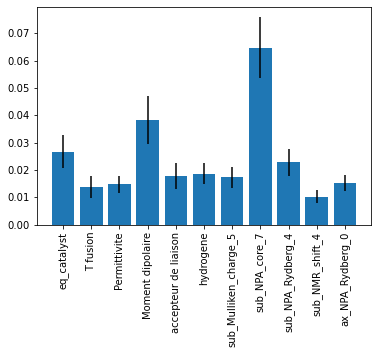

Li
(-0.5319175640217443, 0.04963222066588969)


/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


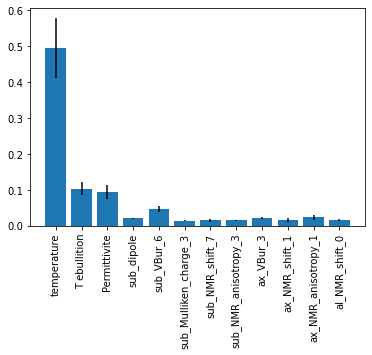

Zn
(0.39822420967998456, 0.03083881224986607)


/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


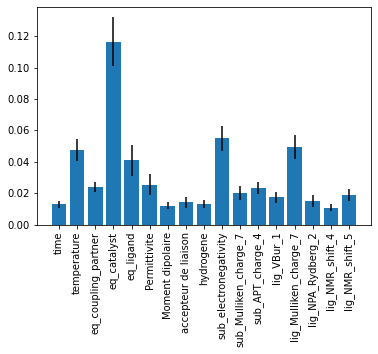

RMgX
(0.3433147274639306, 0.008299612223068284)


/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


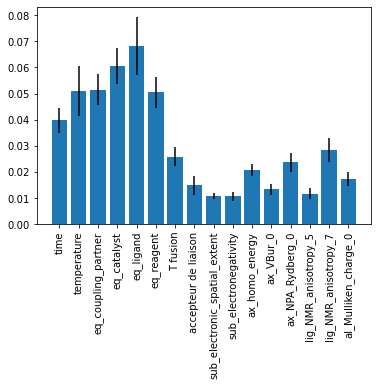

B
(0.5070363524413345, 0.011059296892083417)


/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


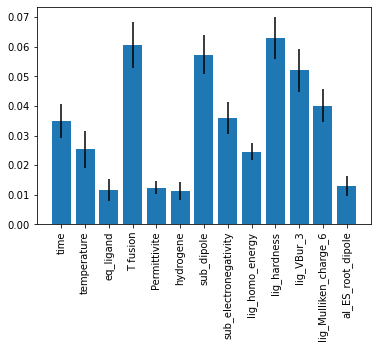

C-H
(0.4199935832956177, 0.00643807562477107)


/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


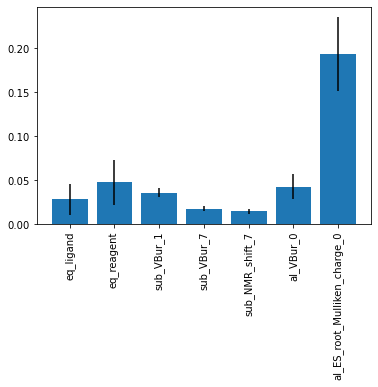

NCO
(0.45938938725735873, 0.01044986297800155)


/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


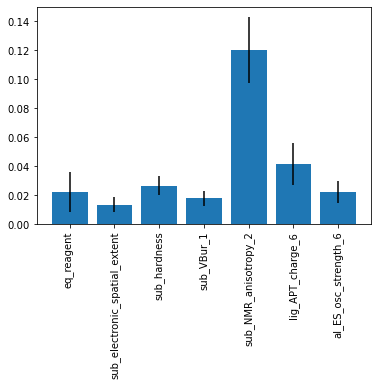

CO2
(0.04620856459869381, 0.01790404703923209)


/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


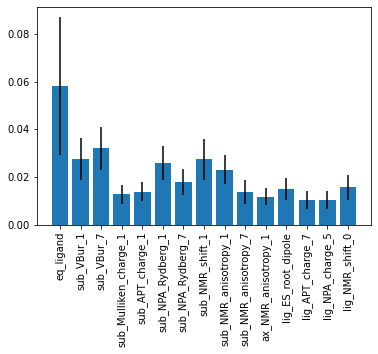

NH
(0.35453800251695444, 0.03851254205726014)


/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


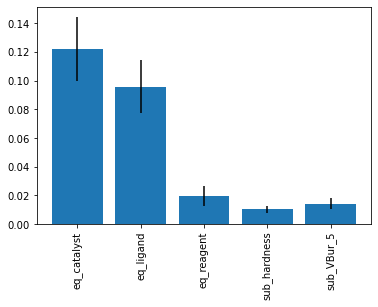

Si
(0.662017009776522, 0.020369686349373275)


/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


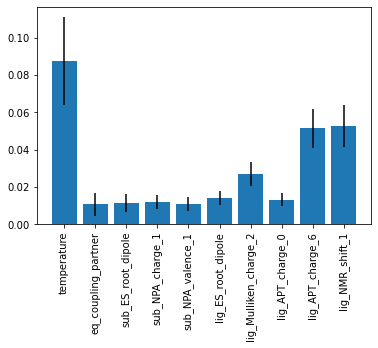

Al
(0.07902176734190117, 0.03329394598959985)


In [15]:
# Generates all features by differences in importance for each coupling partner
coupling_partner_classes = nicolit.coupling_partner_class.unique()

n_rep = 40

# list with all the permutation importances by coupling partner class + by 
Pi = []
R = []

for cp in coupling_partner_classes:
    nicolit_restr = nicolit[nicolit['coupling_partner_class'] == cp]
    nicolit_float = nicolit_restr.select_dtypes(include=[np.float64])
    nicolit_float.drop(columns=['isolated_yield', 'polarisabilite', 'Unnamed: 9', 'analytical_yield'], 
                       inplace=True)
    L = list(nicolit_float.columns)
    L.remove("yield")
    regr = RandomForestRegressor()
    X = nicolit_float.drop(columns=['yield']).values
    y = nicolit_float['yield']
    regr.fit(X,y)
    pi = permutation_importance(regr, X, y, 
                                scoring=None, 
                                n_repeats=n_rep,
                                max_samples=1.0)
    Pi.append(pi)
    PC = principal_components(pi, L)
    print(cp)
    print(perf_param(nicolit_float, PC[0]))
    R.append(PC)

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


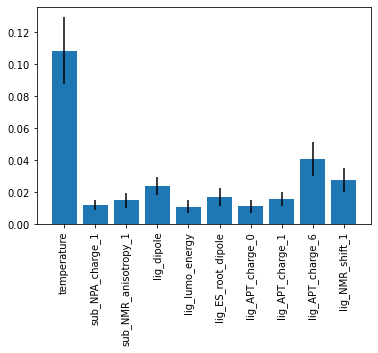

full
(0.34353238884273407, 0.029220929576380054)


In [17]:
# Add features importances for full data-set trained model

nicolit_full = nicolit_restr.select_dtypes(include=[np.float64])
nicolit_full.drop(columns=['isolated_yield', 'polarisabilite', 'Unnamed: 9', 'analytical_yield'], 
                       inplace=True)
regr = RandomForestRegressor()
X = nicolit_float.drop(columns=['yield']).values
y = nicolit_float['yield']
regr.fit(X,y)
pi = permutation_importance(regr, X, y, 
                            scoring=None, 
                            n_repeats=n_rep,
                            max_samples=1.0)
L = list(nicolit_full.columns)
L.remove("yield")
PC = principal_components(pi, L)
print("full")
print(perf_param(nicolit_full, PC[0]))
Pi.append(pi)
R.append(PC)

In [18]:
# get dataframe with importances
df_dict = {}
values = []
L = nicolit_float.columns.to_list()
L.remove('yield')
for j, cp  in enumerate(coupling_partner_classes):
    df_dict.update({cp:pd.DataFrame.from_dict(data=Pi[j], orient='index', columns=L)})
# add full
df_dict.update({'full':pd.DataFrame.from_dict(data=Pi[j+1], orient='index', columns=L)})

In [19]:
# Radar plot for mean importance in model for each model
#1.  display attributes and classes
nicolit_float.columns
tT = ['time', 'temperature']
sol = ['T ebullition', 'T fusion', 'Permittivite','Moment dipolaire',
       'donneur de liaison hydrogene', 'accepteur de liaison', 'hydrogene']
eq = [i for i in nicolit_float.columns if 'eq_' in i]
sub = [i for i in nicolit_float.columns if 'sub_' in i]
ax = [i for i in nicolit_float.columns if 'ax_' in i]
lig = [i for i in nicolit_float.columns if 'lig_' in i]
al = [i for i in nicolit_float.columns if 'al_' in i]

comps = ['tT', 'solvent', 'molar ratios', 'substrate', 'coupling partner',
        'ligand', 'lewis acid']


#2.  plot radar plot for one model
def get_radars(cp, df_dict, n_rep):
    radar_mean = []
    for comp in [tT, sol, eq, sub, ax, lig, al]:   
        mean_imp_comp = np.sum(df_dict[cp][comp].loc['importances_mean'])
        radar_mean.append(mean_imp_comp)

    all_tests = df_dict[cp][comp].loc['importances']
    all_radars =[]
    for i in range(n_rep):
        radar_single = []
        for comp in [tT, sol, eq, sub, ax, lig, al]:   
            mean_imp_comp = df_dict[cp][comp].loc['importances']
            comp_single = np.sum([mean_imp_comp[j][i] for j in range(np.shape(mean_imp_comp)[0])])
            radar_single.append(comp_single)
        all_radars.append(radar_single)
    
    return radar_mean, all_radars

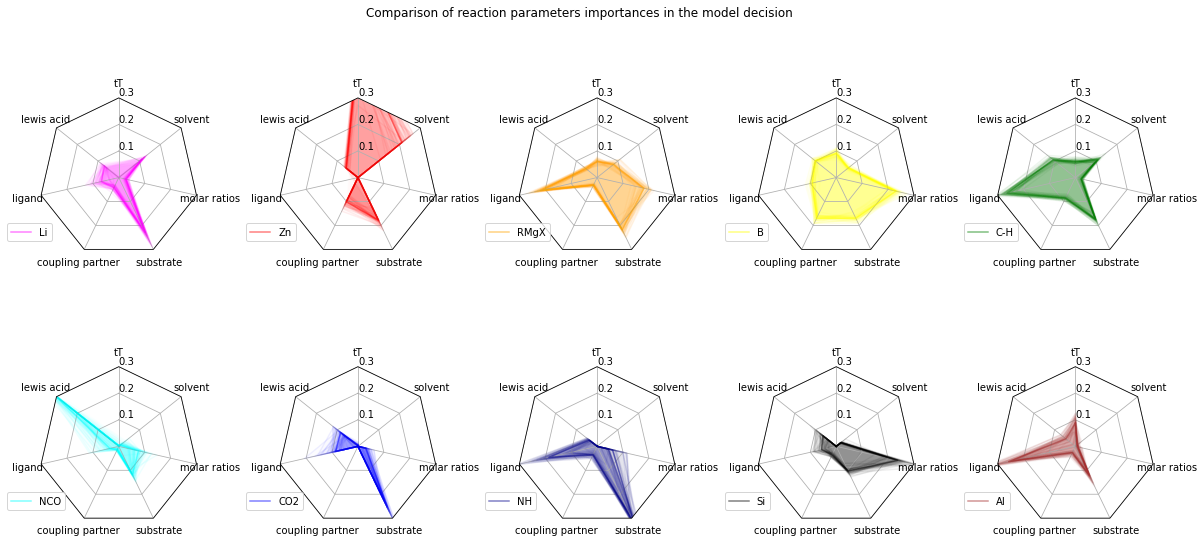

In [30]:
#3.  plot radar plot for all models
from math import pi

nrows = 2
ncols = np.trunc(len(coupling_partner_classes)/2)

# number of variable
categories=comps
N = len(categories)
# Initialise the spider plot
theta = radar_factory(N, frame='polygon')


fig, axs = plt.subplots(figsize=(20, 8), nrows=2, ncols=5,
                            subplot_kw=dict(projection='radar'))
fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

def plot_radar(cp, ax, color, df_dict=df_dict, n_rep=n_rep):
    radar, all_radars = get_radars(cp=cp, df_dict=df_dict, n_rep=n_rep)
    ax.plot(theta, radar, color=color, alpha=0.5, label=cp)
    for i in range(len(all_radars)):
        ax.plot(theta, all_radars[i], color=color, alpha=0.05)
        ax.fill(theta, all_radars[i], color=color, alpha=0.01)
    ax.set_rgrids([0.1, 0.2, 0.3])
    ax.set_rlim([0,0.3])
    ax.set_rlabel_position(0.1)
    ax.set_varlabels(categories)
# Draw one axe per variable + add labels labels yet
#    plt.xticks(angles, categories)
#for label,i in zip(ax.get_xticklabels(),range(0,len(angles))):
#    if i<len(angles)/2:
#        angle_text=angles[i]*(-180/pi)+90
#        label.set_horizontalalignment('left')

#    else:
#        angle_text=angles[i]*(-180/pi)-90
#        label.set_horizontalalignment('right')
#    label.set_rotation(angle_text)
# Draw ylabels
    ax.set_rlabel_position(0)    
  #  ax.set_title(cp, fontsize=10)
  #  ax.set_theta_offset(pi / N)
    ax.set_theta_direction(-1)
    ax.legend(loc=[-0.2,0.1])

colors= ['magenta', 'red', 'orange', 'yellow', 'green', 'cyan', 'blue', 'Darkblue',
        'black', 'brown']

for i, cp  in enumerate(coupling_partner_classes):
    if i < 5:
        ncol = i
        nrow =0
    else:
        ncol = i-5
        nrow=1
    plot_radar(cp=cp, ax=axs[nrow, ncol], color=colors[i], df_dict=df_dict, n_rep=n_rep)
plt.suptitle("Comparison of reaction parameters importances in the model decision")
fig.subplots_adjust(wspace=0.5, hspace=0.40, top=0.85, bottom=0.05)
fig.savefig('images/permutation_importances_cp.png', dpi=300, bbox_inches="tight")
plt.show()

In [27]:
# Figure restrained to Boron and Full training

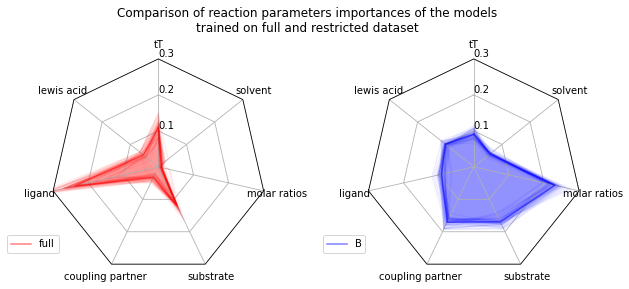

In [37]:
# number of variable
categories=comps
N = len(categories)
# Initialise the spider plot
theta = radar_factory(N, frame='polygon')

fig, axs = plt.subplots(figsize=(10, 4), nrows=1, ncols=2,
                            subplot_kw=dict(projection='radar'))
fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

plot_radar(cp='B', ax=axs[1], color='blue', df_dict=df_dict, n_rep=n_rep)
plot_radar(cp='full', ax=axs[0], color='red', df_dict=df_dict, n_rep=n_rep)

plt.suptitle("Comparison of reaction parameters importances of the models\ntrained on full and restricted dataset")

fig.subplots_adjust(wspace=0.3, hspace=0.40, top=0.8, bottom=0.05)
fig.savefig('images/permutation_importances_B_full.svg', dpi=300, bbox_inches="tight")
plt.show()